In [1]:
from detrex.demo.predictors import DefaultPredictor

from sahi.utils.detectron2 import Detectron2TestConstants
from sahi.utils.detectron2 import export_cfg_as_yaml
# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image
from detectron2.config import LazyConfig, instantiate

/home/wangzhaoyang/anaconda3/envs/detrex/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = "/home/wangzhaoyang/wzy/detrex-main/dino_r50_4scale_12ep.pth"
config_path = "/home/wangzhaoyang/wzy/detrex-main/projects/dino/configs/dino-resnet/dino_r50_4scale_12ep.py"
detection_model = AutoDetectionModel.from_pretrained(
    model_type='detrex',
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.5,
    image_size=640,
    # device='cuda:0',
)

------caocaoclasss------- <class 'sahi.models.detrex.DetrexDetectionModel'>


01/28/2024 15:52:52 - INFO - fvcore.common.checkpoint -   [Checkpointer] Loading from /home/wangzhaoyang/wzy/detrex-main/dino_r50_4scale_12ep.pth ...
01/28/2024 15:52:53 - INFO - detectron2.checkpoint.c2_model_loading -   Following weights matched with model:
| Names in Model             | Names in Checkpoint                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [3]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

self.model------------------------------ <detrex.demo.predictors.DefaultPredictor object at 0x7fb8cbe69790>
prediction_result------------------------------ {'instances': Instances(num_instances=300, image_height=580, image_width=1068, fields=[pred_boxes: Boxes(tensor([[448.9917, 308.6013, 496.6141, 341.7244],
        [767.0604, 261.4983, 794.8121, 283.7818],
        [564.2872, 242.5930, 588.6320, 262.4179],
        ...,
        [661.0065, 175.5499, 678.9704, 187.8966],
        [656.3857, 169.6766, 666.8871, 180.7487],
        [548.2736, 237.2223, 580.4908, 252.4374]], device='cuda:0')), scores: tensor([0.7243, 0.6777, 0.5835, 0.5741, 0.5601, 0.5597, 0.5492, 0.5326, 0.5307,
        0.5240, 0.5195, 0.4623, 0.4483, 0.4275, 0.4135, 0.4082, 0.4040, 0.3774,
        0.3631, 0.3266, 0.3115, 0.2915, 0.2881, 0.2837, 0.2788, 0.2598, 0.2307,
        0.2263, 0.2246, 0.2242, 0.2233, 0.2209, 0.2200, 0.2171, 0.2140, 0.2074,
        0.2072, 0.2057, 0.2044, 0.2036, 0.1993, 0.1922, 0.1852, 0.1846, 0.1780

/home/wangzhaoyang/anaconda3/envs/detrex/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541035/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


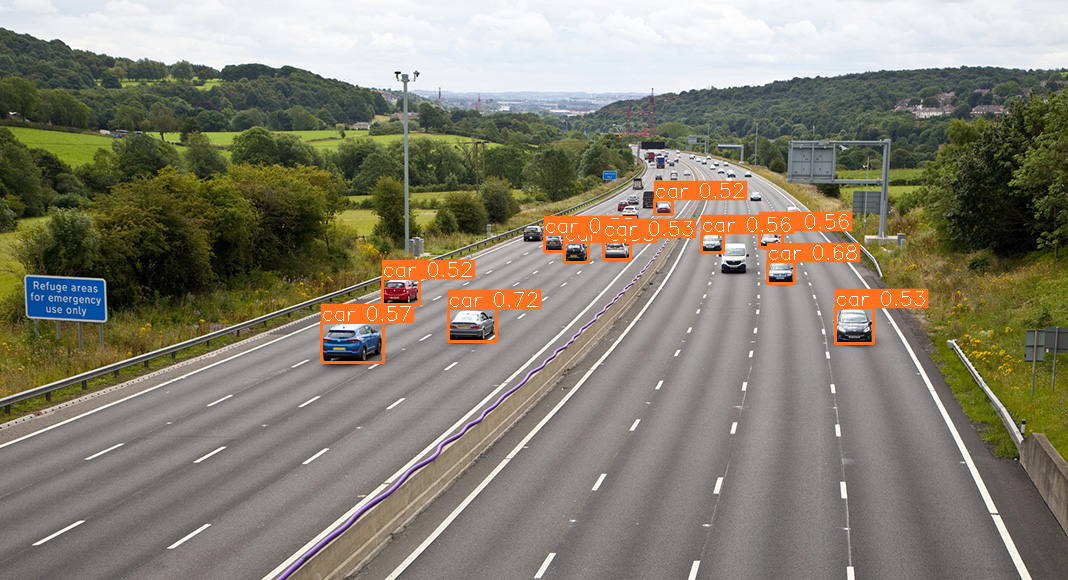

In [4]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a Detrex Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [5]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 15 number of slices.
self.model------------------------------ <detrex.demo.predictors.DefaultPredictor object at 0x7fb8cbe69790>
prediction_result------------------------------ {'instances': Instances(num_instances=300, image_height=256, image_width=256, fields=[pred_boxes: Boxes(tensor([[  8.4091, 111.2837,  17.1206, 116.0068],
        [ 99.6430, 129.4508, 110.6991, 135.9282],
        [  8.4091, 111.2837,  17.1206, 116.0068],
        ...,
        [  8.4091, 111.2837,  17.1206, 116.0068],
        [118.6093, 133.0225, 123.4031, 137.9874],
        [119.3453, 134.2366, 123.4764, 138.1637]], device='cuda:0')), scores: tensor([0.1864, 0.1527, 0.1495, 0.1290, 0.1275, 0.1266, 0.1241, 0.1066, 0.0945,
        0.0936, 0.0925, 0.0918, 0.0914, 0.0878, 0.0867, 0.0864, 0.0861, 0.0848,
        0.0847, 0.0841, 0.0811, 0.0810, 0.0800, 0.0795, 0.0776, 0.0755, 0.0747,
        0.0742, 0.0732, 0.0712, 0.0707, 0.0677, 0.0675, 0.0670, 0.0662, 0.0661,
        0.0648, 0.0648, 0.0632, 0

- Visualize predicted bounding boxes and masks over the original image:

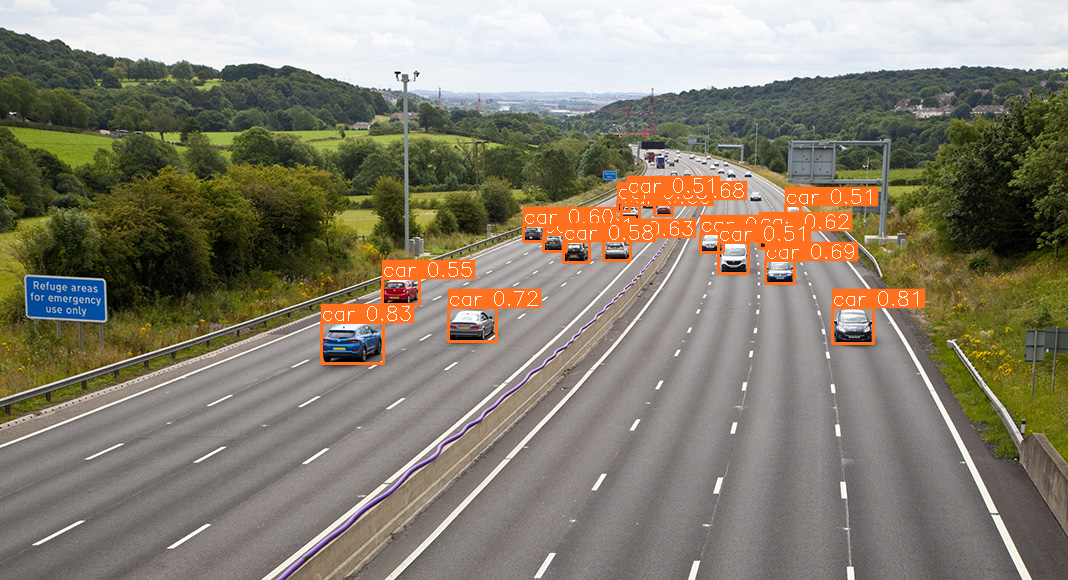

In [6]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [7]:
object_prediction_list = result.object_prediction_list

In [8]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(321.2779235839844, 322.3314743041992, 383.7966003417969, 363.27955627441406), w: 62.5186767578125, h: 40.948081970214844>,
    mask: None,
    score: PredictionScore: <value: 0.8291687965393066>,
    category: Category: <id: 2, name: car>>

In [9]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [321.2779235839844,
   322.3314743041992,
   62.5186767578125,
   40.948081970214844],
  'score': 0.8291687965393066,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2560},
 {'image_id': None,
  'bbox': [832.2136688232422,
   307.7886047363281,
   41.70515060424805,
   36.144805908203125],
  'score': 0.8076267838478088,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1507},
 {'image_id': None,
  'bbox': [448.3519058227539,
   307.8641128540039,
   48.26219940185547,
   33.86028289794922],
  'score': 0.724310576915741,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1634}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [10]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [321.2779235839844,
   322.3314743041992,
   62.5186767578125,
   40.948081970214844],
  'score': 0.8291687965393066,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2560},
 {'image_id': 1,
  'bbox': [832.2136688232422,
   307.7886047363281,
   41.70515060424805,
   36.144805908203125],
  'score': 0.8076267838478088,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1507},
 {'image_id': 1,
  'bbox': [448.3519058227539,
   307.8641128540039,
   48.26219940185547,
   33.86028289794922],
  'score': 0.724310576915741,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1634}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [11]:
!pip install -U imantics

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [12]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [14]:

model_device = "cuda:0" # or 'cuda:0'
model_confidence_threshold = 0.5

slice_height = 480
slice_width = 480
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

model_type='detrex'
model_path = "/home/wangzhaoyang/wzy/detrex-main/dino_r50_4scale_12ep.pth"
config_path = "/home/wangzhaoyang/wzy/detrex-main/projects/dino/configs/dino-resnet/dino_r50_4scale_12ep.py"

detection_model = AutoDetectionModel.from_pretrained(
    model_type='detrex',
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.5,
    image_size=640,
    # device='cuda:0',
)

------caocaoclasss------- <class 'sahi.models.detrex.DetrexDetectionModel'>


01/28/2024 16:07:19 - INFO - fvcore.common.checkpoint -   [Checkpointer] Loading from /home/wangzhaoyang/wzy/detrex-main/dino_r50_4scale_12ep.pth ...
01/28/2024 16:07:19 - INFO - detectron2.checkpoint.c2_model_loading -   Following weights matched with model:
| Names in Model             | Names in Checkpoint                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

- Perform sliced inference on given folder:

In [15]:


predict(
    detection_model = detection_model,
    # model_type=model_type,
    # model_path=model_path,
    # model_config_path=config_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                     | 0/3 [00:00<?, ?it/s]

Performing prediction on 6 number of slices.
self.model------------------------------ <detrex.demo.predictors.DefaultPredictor object at 0x7fb919d8f610>
prediction_result------------------------------ {'instances': Instances(num_instances=300, image_height=480, image_width=480, fields=[pred_boxes: Boxes(tensor([[322.3450, 323.4083, 382.8347, 362.6327],
        [449.3244, 310.2628, 479.9164, 341.4854],
        [447.2191, 286.9726, 480.0000, 341.7348],
        ...,
        [  1.3176, 341.9877,   9.8548, 349.7756],
        [417.5802, 253.4361, 432.3203, 259.9561],
        [340.7150, 130.8432, 345.6003, 138.5674]], device='cuda:0')), scores: tensor([0.6737, 0.5270, 0.4108, 0.3526, 0.3050, 0.2827, 0.2578, 0.2487, 0.2269,
        0.2238, 0.2140, 0.1944, 0.1896, 0.1734, 0.1720, 0.1706, 0.1628, 0.1589,
        0.1582, 0.1363, 0.1324, 0.1303, 0.1296, 0.1262, 0.1138, 0.1134, 0.1094,
        0.1090, 0.0975, 0.0964, 0.0956, 0.0955, 0.0950, 0.0931, 0.0904, 0.0902,
        0.0901, 0.0888, 0.0879, 0.

Performing inference on images:  33%|████▎        | 1/3 [00:00<00:00,  3.55it/s]

prediction_result------------------------------ {'instances': Instances(num_instances=300, image_height=480, image_width=480, fields=[pred_boxes: Boxes(tensor([[245.5487, 207.9313, 284.6364, 242.3160],
        [178.6947, 160.4211, 205.5866, 182.2747],
        [161.8849,  91.0360, 173.6370, 100.8210],
        ...,
        [  5.5889, 204.2039,  20.8886, 220.6219],
        [308.5551, 133.2509, 317.1865, 138.9153],
        [245.5487, 207.9313, 284.6364, 242.3160]], device='cuda:0')), scores: tensor([0.6812, 0.5702, 0.5283, 0.4807, 0.3887, 0.3844, 0.3419, 0.3306, 0.3262,
        0.3120, 0.2963, 0.2942, 0.2853, 0.2806, 0.2714, 0.2709, 0.2662, 0.2638,
        0.2586, 0.2487, 0.2432, 0.2359, 0.2339, 0.2299, 0.2208, 0.2138, 0.2132,
        0.2131, 0.2090, 0.2033, 0.1999, 0.1988, 0.1984, 0.1944, 0.1925, 0.1913,
        0.1842, 0.1778, 0.1769, 0.1736, 0.1699, 0.1649, 0.1643, 0.1638, 0.1602,
        0.1578, 0.1571, 0.1549, 0.1544, 0.1542, 0.1532, 0.1498, 0.1472, 0.1439,
        0.1423, 0.1414, 0.1

Performing inference on images:  67%|████████▋    | 2/3 [00:00<00:00,  3.61it/s]

{'instances': Instances(num_instances=300, image_height=480, image_width=480, fields=[pred_boxes: Boxes(tensor([[218.6741, 242.1828, 441.2885, 409.4896],
        [354.1746, 269.7606, 373.1273, 289.0638],
        [383.4489, 267.5994, 399.8437, 282.9570],
        ...,
        [  0.0000, 227.6942,   2.5778, 330.9273],
        [477.1981, 325.3756, 480.0000, 348.9561],
        [291.0028, 414.6508, 319.5127, 442.1797]], device='cuda:0')), scores: tensor([0.7485, 0.3291, 0.1622, 0.1376, 0.1364, 0.1268, 0.1230, 0.1214, 0.1105,
        0.1080, 0.1074, 0.0900, 0.0793, 0.0786, 0.0753, 0.0742, 0.0732, 0.0728,
        0.0693, 0.0690, 0.0646, 0.0572, 0.0533, 0.0487, 0.0479, 0.0450, 0.0428,
        0.0417, 0.0401, 0.0399, 0.0396, 0.0395, 0.0383, 0.0378, 0.0362, 0.0354,
        0.0341, 0.0338, 0.0329, 0.0316, 0.0305, 0.0294, 0.0293, 0.0289, 0.0289,
        0.0285, 0.0265, 0.0252, 0.0248, 0.0245, 0.0234, 0.0230, 0.0226, 0.0224,
        0.0223, 0.0217, 0.0214, 0.0214, 0.0214, 0.0213, 0.0210, 0.0210, 0.0

Performing inference on images: 100%|█████████████| 3/3 [00:00<00:00,  3.72it/s]

{'instances': Instances(num_instances=300, image_height=480, image_width=480, fields=[pred_boxes: Boxes(tensor([[3.8195e+02, 2.6049e+02, 4.0995e+02, 2.8381e+02],
        [2.2021e+02, 2.3938e+02, 2.4636e+02, 2.5989e+02],
        [6.4373e+01, 3.0968e+02, 1.1158e+02, 3.4134e+02],
        ...,
        [2.1855e+02, 1.6988e+02, 2.3298e+02, 1.8109e+02],
        [1.0471e-01, 2.7782e+02, 3.4976e+01, 3.0388e+02],
        [3.1627e+02, 2.3373e+02, 3.3780e+02, 2.5194e+02]], device='cuda:0')), scores: tensor([0.6317, 0.6183, 0.6144, 0.5884, 0.5696, 0.5593, 0.5467, 0.5292, 0.5182,
        0.4918, 0.4506, 0.4207, 0.4180, 0.3982, 0.3884, 0.3875, 0.3547, 0.2828,
        0.2801, 0.2797, 0.2441, 0.2371, 0.2344, 0.2315, 0.2275, 0.2227, 0.2110,
        0.2084, 0.2082, 0.2037, 0.2011, 0.1952, 0.1919, 0.1907, 0.1903, 0.1890,
        0.1882, 0.1856, 0.1828, 0.1777, 0.1772, 0.1768, 0.1742, 0.1736, 0.1726,
        0.1715, 0.1691, 0.1658, 0.1655, 0.1639, 0.1634, 0.1604, 0.1599, 0.1543,
        0.1539, 0.1487, 0.1